<h3>Практическое задание №3. Распределение запроса на ресурсы</h3>

In [64]:
import math as m;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.optimize import root;
from collections import defaultdict

In [74]:
hB = 10;
hU = 1.5;
fC = 28e9;
Pt = 10 * m.log(2e3, 10);
GB = 10;
GU = 2;
E = 2.1;
N0 = -174;
B = 400e6;
Pr = -9.4;
R = 150; # ???

In [75]:
mcs_table = [
    {"CQI": 0, "MCS": "out of range", "SE": 0, "SNR_dB": -np.inf},
    {"CQI": 1, "MCS": "QPSK, 78/1024", "SE": 0.15237, "SNR_dB": -9.478},
    {"CQI": 2, "MCS": "QPSK, 120/1024", "SE": 0.2344, "SNR_dB": -6.658},
    {"CQI": 3, "MCS": "QPSK, 193/1024", "SE": 0.377, "SNR_dB": -4.098},
    {"CQI": 4, "MCS": "QPSK, 308/1024", "SE": 0.6016, "SNR_dB": -1.798},
    {"CQI": 5, "MCS": "QPSK, 449/1024", "SE": 0.877, "SNR_dB": 0.399},
    {"CQI": 6, "MCS": "QPSK, 602/1024", "SE": 1.1758, "SNR_dB": 2.424},
    {"CQI": 7, "MCS": "16QAM, 378/1024", "SE": 1.4766, "SNR_dB": 4.489},
    {"CQI": 8, "MCS": "16QAM, 490/1024", "SE": 1.9141, "SNR_dB": 6.367},
    {"CQI": 9, "MCS": "16QAM, 616/1024", "SE": 2.4063, "SNR_dB": 8.456},
    {"CQI": 10, "MCS": "16QAM, 466/1024", "SE": 2.7305, "SNR_dB": 10.266},
    {"CQI": 11, "MCS": "16QAM, 567/1024", "SE": 3.3223, "SNR_dB": 12.218},
    {"CQI": 12, "MCS": "16QAM, 666/1024", "SE": 3.9023, "SNR_dB": 14.122},
    {"CQI": 13, "MCS": "16QAM, 772/1024", "SE": 4.5234, "SNR_dB": 15.849},
    {"CQI": 14, "MCS": "16QAM, 873/1024", "SE": 5.1152, "SNR_dB": 17.786},
    {"CQI": 15, "MCS": "16QAM, 948/1024", "SE": 5.5547, "SNR_dB": 19.809}
];

target_rates = [5e6, 10e6, 20e6];

Ряды распределения запросов на ресурсы:

Целевая скорость: 5000000.0 Мбит/с
Доступные MCS:
CQI 1: QPSK, 78/1024
  SNR: -9.48 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 2: QPSK, 120/1024
  SNR: -6.66 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 3: QPSK, 193/1024
  SNR: -4.10 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 4: QPSK, 308/1024
  SNR: -1.80 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 5: QPSK, 449/1024
  SNR: 0.40 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 6: QPSK, 602/1024
  SNR: 2.42 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 7: 16QAM, 378/1024
  SNR: 4.49 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 8: 16QAM, 490/1024
  SNR: 6.37 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 9: 16QAM, 616/1024
  SNR: 8.46 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.0000 Мбит/с
CQI 10: 16QAM, 466/1024
  SNR: 10.27 дБ
  Вероятность: 1.0000
  Доля ресурсов: 50.00

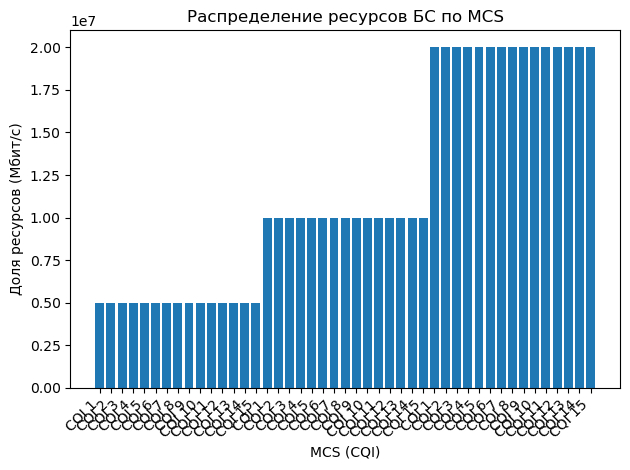


Сравнение с формулой Шеннона:

Для 50.00000000000001 Мбит/с (CQI 1):
Реальная скорость MCS: 60.95 Мбит/с
Предел Шеннона: 61.66 Мбит/с
Разница: 0.72 Мбит/с

Для 50.00000000000001 Мбит/с (CQI 2):
Реальная скорость MCS: 93.76 Мбит/с
Предел Шеннона: 112.80 Мбит/с
Разница: 19.04 Мбит/с

Для 50.00000000000001 Мбит/с (CQI 3):
Реальная скорость MCS: 150.80 Мбит/с
Предел Шеннона: 189.71 Мбит/с
Разница: 38.91 Мбит/с

Для 50.00000000000001 Мбит/с (CQI 4):
Реальная скорость MCS: 240.64 Мбит/с
Предел Шеннона: 292.82 Мбит/с
Разница: 52.18 Мбит/с

Для 50.00000000000001 Мбит/с (CQI 5):
Реальная скорость MCS: 350.80 Мбит/с
Предел Шеннона: 427.12 Мбит/с
Разница: 76.32 Мбит/с

Для 50.00000000000001 Мбит/с (CQI 6):
Реальная скорость MCS: 470.32 Мбит/с
Предел Шеннона: 583.23 Мбит/с
Разница: 112.91 Мбит/с

Для 50.00000000000001 Мбит/с (CQI 7):
Реальная скорость MCS: 590.64 Мбит/с
Предел Шеннона: 772.11 Мбит/с
Разница: 181.47 Мбит/с

Для 50.00000000000001 Мбит/с (CQI 8):
Реальная скорость MCS: 765.64 Мбит/с

In [80]:
N0_linear = 10**(N0/10) * 1e-3 
C_dB = Pt + GB + GU - 20*m.log10(fC) - 3.24
C_linear = 10**(C_dB/10) / (N0_linear * B)

def F_S(s):
    return 1 - ((C_linear/s)**(1/E)/R)**2

results = []
for rate in target_rates:    
    # Находим все MCS, которые могут обеспечить эту скорость
    suitable_mcs = [mcs for mcs in mcs_table[1:] if mcs["SE"] * B >= rate]
    
    if not suitable_mcs:
        print(f"Внимание: Нет подходящих MCS для скорости {rate} Мбит/с")
        continue
    
    # Для каждого подходящего MCS считаем вероятность и ресурсы
    for mcs in suitable_mcs:
        s_threshold = 10**(mcs["SNR_dB"]/10)
        prob = F_S(s_threshold)
        
        results.append({
            "Target Rate": rate,
            "MCS": mcs["MCS"],
            "CQI": mcs["CQI"],
            "SNR_dB": mcs["SNR_dB"],
            "Spectral Efficiency": mcs["SE"],
            "Actual Rate": mcs["SE"] * B / 1e6,  # В Мбит/с
            "Probability": prob,
            "Resources": prob * rate  # Доля ресурсов в Мбит/с
        })

# Группируем результаты по целевым скоростям
rate_groups = defaultdict(list)
for res in results:
    rate_groups[res["Target Rate"]].append(res)

# Вывод результатов
print("Ряды распределения запросов на ресурсы:")
for rate, group in rate_groups.items():
    print(f"\nЦелевая скорость: {rate} Мбит/с")
    print("Доступные MCS:")
    for item in sorted(group, key=lambda x: x["SNR_dB"]):
        print(f"CQI {item['CQI']}: {item['MCS']}")
        print(f"  SNR: {item['SNR_dB']:.2f} дБ")
        print(f"  Вероятность: {item['Probability']:.4f}")
        print(f"  Доля ресурсов: {item['Resources']*10e-6:.4f} Мбит/с")

# 8. График распределения ресурсов
rates = []
resources = []
labels = []
for rate, group in rate_groups.items():
    for item in group:
        rates.append(rate)
        resources.append(item["Resources"])
        labels.append(f"CQI {item['CQI']}")

x = np.arange(len(resources))
plt.bar(x, resources)
plt.xticks(x, labels, rotation=45, ha='right')
plt.xlabel("MCS (CQI)")
plt.ylabel("Доля ресурсов (Мбит/с)")
plt.title("Распределение ресурсов БС по MCS")
plt.tight_layout()
plt.show()

# 9. Сравнение с формулой Шеннона
def shannon_capacity(snr_linear):
    return B * m.log2(1 + snr_linear)

print("\nСравнение с формулой Шеннона:")
for res in results:
    shannon_rate = shannon_capacity(10**(res['SNR_dB']/10))/1e6
    print(f"\nДля {res['Target Rate'] * 10e-6} Мбит/с (CQI {res['CQI']}):")
    print(f"Реальная скорость MCS: {res['Actual Rate']:.2f} Мбит/с")
    print(f"Предел Шеннона: {shannon_rate:.2f} Мбит/с")
    print(f"Разница: {shannon_rate - res['Actual Rate']:.2f} Мбит/с")